# COVID-19: PROYECTO DE CIENCIA DE DATOS
### BEDU-Procesamiento-de-Datos-con-Python-Santander
#### **Integrantes:**  
+ #### José David Vázquez Rojas  
+ #### Gustavo Alejandro Garduño Macedo

###  1. Identificación de la problemática. 


#### a) Problemática (Resolver un problema o entenderlo)

 La problemática de salud generada por el COVID-19 en México

Objetivos:

De los datos proporcionados por la Secretaría de Salud y el departamento de epidemiología (DGE), mediante una buena recolección, limpieza y transformación se busca:

- Lograr un mejor entendimiento de la problemática originada por el COVID-19 en México mediante análisis descriptivos y gráficos.
- Identificar factores  inherentes a la población mexicana que sean significativos en el aumento o disminución de la mortalidad. (modelo de regresión logística)

### b) Investigación y búsqueda de soluciones anteriores

[Fuentes de información](https://www.notion.so/6be588cb306a4c5bab6b7146f6dd69f1)

**Ideas**

- Dashboard-Tracker con información de importancia: Casos globales, Casos Activos, Tasa de incidencia, cociente de casos-fatalidad, tasa de pruebas, top de países por : muertes, casos activos, casos, tasa de mortalidad. Casos diarios
- También estaría interesante observar que pasa con las pruebas y vacunas (lo cual es una problemática en México)
- Predecir nuevos casos (series de tiempo) (Nota: Para ello tener mejor nociones de Confirmados, Recuperados y Muertos ) (Este problema de predicción es importante para controlar la ocupación hospitalaria una problemática en México )
- Creo que la mejor idea dentro de las capacidades/conocimiento y habilidades es realizar únicamente un análisis descriptivo que  ayude a comprender la situación que vive en México en general y posiblemente predicciones para los nuevos casos usando series de tiempo u otros modelos (regresión logística, etc.) para identificar factores clínicos de riesgo que afecten en la mortalidad.

### c) Resumen

- ¿Qué problema identificaron?
La base abierta obtenida del portal de Datos Abiertos de México, brinda una base estructurada y bien documentada, sin embargo, desde noviembre 2020 se ajustó para que tuvieran un diccionario de datos y por ende la base se tiene que ajustar a esto.
- ¿Qué investigaron sobre el tema?
Obtener el diccionario de datos no es intuitivo ni fácil de obtener, para ello, se tiene que indagar en otras páginas que tienen el diccionario descrito en el portal oficial de datos abiertos de México. Esto se debe a una mala organización en su accesibilidad. Aunque la descripción es fácil de obtener, los catalogos para todos los campos no.
- ¿Qué soluciones se han intentado/hecho anteriormente para intentar entender/resolver el problema?
Hay muchas propuestas para transformar la base y otras ya bien implementadas, sin embargo, optamos por tomar el reto de ignorar estas posibilidades y hacerlo con los conocimientos adquiridos de manipulación de datos para lograrlo.

### Base de datos

Una fuente confiable y verificada es en el sitio oficial de datos abiertos Dirección General de Epidemiología para trabajar con el análisis:    

[Datos Abiertos Bases Históricas](https://www.gob.mx/salud/documentos/datos-abiertos-bases-historicas-direccion-general-de-epidemiologia)

### Preguntas de interés

- Sin duda uno de los aspectos más interesantes es: ¿ Como se comporta el total de casos nuevos por día  a través del tiempo ? ¿Se podría predecir o dar un intervalo de confianza para días subsecuentes ? Sin duda esto sería una buena medida para predecir la demanda hospitalaria.
- También seria de interés conocer: ¿Cuáles son los estados con más total de: casos, defunciones, recuperaciones, casos activos ? ¿Cuál es la tasa de mortalidad por estado? ¿Cuál es la tasa de incidencia por estado?
- ¿ Existen factores (clínicos y no clínicos)  que sean significativos para predecir el riesgo (probabilidad) de mortalidad ?

### Notas

- La base de datos de epidemiología no se actualiza automáticamente, se suben nuevos archivos, por cada día, lo cual lo vuelve difícil de analizar
- Habría ver que se puede hacer para combinarlas, o que información se podría sacar de 1 solo día
- O bien solo enfocarse en la mundial de JHU y formular preguntas a partir de allí
- La decisión de trabajar con la base de datos abiertos de México fue por que contenía mayor descripción en ella, sin embargo, es necesario trasnformarla

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from pprint import pprint

### Importar datos
Los datos que usaremos para este proyecto se obtuvieron del portal de Datos Abiertos de la página oficial del Gobierno de México al corte del 28 de Febrero del 2021.

In [2]:
datosCovid = pd.read_csv('210228COVID19MEXICO.csv',low_memory=False)

Haremos el conteo de registros de la base actual y el encabezado de la base

In [3]:
print(datosCovid.index)
datosCovid.head()
print(datosCovid.shape)

RangeIndex(start=0, stop=5453322, step=1)
(5453322, 40)


Ahora observaremos los nombres de las columnas, notaremos que cuentan con varios campos que van desde la última actualización, datos personales del paciente, la determinación si dió positivo a Covid, cormobolidades del paciente y si se recuperó.

In [4]:
pprint(datosCovid.columns)

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA_LAB', 'RESULTADO_LAB',
       'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO', 'CLASIFICACION_FINAL',
       'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI'],
      dtype='object')


Antes de iniciar, quitaremos las columnas que no son de nuestro interes para los objetivos del proyecto

In [5]:
datosCovid = datosCovid.drop(columns = ["FECHA_ACTUALIZACION",'ID_REGISTRO','MIGRANTE','PAIS_NACIONALIDAD','PAIS_ORIGEN'])

### Conversión de tipos de datos

Haremos la conversión correcta de los datos para tener un mejor manejo de ellos, por ejemplo, los campos de fechas las convertiremos a tipo Date, ID_Registro a string y otros campos que consideremos necesarios a un formato mejor para su manejo.

In [6]:
datosCovid.dtypes

ORIGEN                    int64
SECTOR                    int64
ENTIDAD_UM                int64
SEXO                      int64
ENTIDAD_NAC               int64
ENTIDAD_RES               int64
MUNICIPIO_RES             int64
TIPO_PACIENTE             int64
FECHA_INGRESO            object
FECHA_SINTOMAS           object
FECHA_DEF                object
INTUBADO                  int64
NEUMONIA                  int64
EDAD                      int64
NACIONALIDAD              int64
EMBARAZO                  int64
HABLA_LENGUA_INDIG        int64
INDIGENA                  int64
DIABETES                  int64
EPOC                      int64
ASMA                      int64
INMUSUPR                  int64
HIPERTENSION              int64
OTRA_COM                  int64
CARDIOVASCULAR            int64
OBESIDAD                  int64
RENAL_CRONICA             int64
TABAQUISMO                int64
OTRO_CASO                 int64
TOMA_MUESTRA_LAB          int64
RESULTADO_LAB             int64
TOMA_MUE

In [7]:
datosCovid.replace('9999-99-99','0000-00-00')
datosCovid['FECHA_INGRESO']=pd.to_datetime(datosCovid['FECHA_INGRESO'].astype(str), format='%Y-%m-%d')
datosCovid['FECHA_SINTOMAS']=pd.to_datetime(datosCovid['FECHA_SINTOMAS'].astype(str), format='%Y-%m-%d')

In [8]:
datosCovid.dtypes

ORIGEN                            int64
SECTOR                            int64
ENTIDAD_UM                        int64
SEXO                              int64
ENTIDAD_NAC                       int64
ENTIDAD_RES                       int64
MUNICIPIO_RES                     int64
TIPO_PACIENTE                     int64
FECHA_INGRESO            datetime64[ns]
FECHA_SINTOMAS           datetime64[ns]
FECHA_DEF                        object
INTUBADO                          int64
NEUMONIA                          int64
EDAD                              int64
NACIONALIDAD                      int64
EMBARAZO                          int64
HABLA_LENGUA_INDIG                int64
INDIGENA                          int64
DIABETES                          int64
EPOC                              int64
ASMA                              int64
INMUSUPR                          int64
HIPERTENSION                      int64
OTRA_COM                          int64
CARDIOVASCULAR                    int64


### Limpieza de datos

Como es una base muy grande, nuestra sorpresa fue que no se encontraba ningún dato vacío,sin embargo, los campos fueron llenados con valores diferentes lo que támbien resulta complicado determinar la limpieza, para esto támbien nos es útil el diccionario de datos donde nos daremos cuenta que hay algunos valores que los podremos homogenizar para tener un mayor control sobre ellos

In [9]:
datosCovid.isna().sum()

ORIGEN                   0
SECTOR                   0
ENTIDAD_UM               0
SEXO                     0
ENTIDAD_NAC              0
ENTIDAD_RES              0
MUNICIPIO_RES            0
TIPO_PACIENTE            0
FECHA_INGRESO            0
FECHA_SINTOMAS           0
FECHA_DEF                0
INTUBADO                 0
NEUMONIA                 0
EDAD                     0
NACIONALIDAD             0
EMBARAZO                 0
HABLA_LENGUA_INDIG       0
INDIGENA                 0
DIABETES                 0
EPOC                     0
ASMA                     0
INMUSUPR                 0
HIPERTENSION             0
OTRA_COM                 0
CARDIOVASCULAR           0
OBESIDAD                 0
RENAL_CRONICA            0
TABAQUISMO               0
OTRO_CASO                0
TOMA_MUESTRA_LAB         0
RESULTADO_LAB            0
TOMA_MUESTRA_ANTIGENO    0
RESULTADO_ANTIGENO       0
CLASIFICACION_FINAL      0
UCI                      0
dtype: int64

In [10]:
datosCovid['EMBARAZO'].value_counts()

2     2766514
97    2627696
1       39911
98      19198
99          3
Name: EMBARAZO, dtype: int64

Si hacemos la prueba del conteo de valores por cada campo, notamos que los únicos valores que se obtienen son de 2,97,1,98 y 99. Cosa muy inusual, el diccionario de datos nos menciona lo siguiente:  

![image.png](imagen.png)


Para el caso del nombre de los estados, es indispensable tenerlos con su nombre original, para ello recurriremos a otro conjunto de datos.  
Importamos el catalogo de estados de México proporcionado por el portal de datos abiertos para sustituirlos por los valores en la base de datos actual del Covid para tener un mejor manejo de ellos

In [11]:
entidades=pd.read_csv('catalogoEstados.csv')
entidades.head()

,CLAVE_ENTIDAD,ENTIDAD_FEDERATIVA,ABREVIATURA
0,1,AGUASCALIENTES,AS
1,2,BAJA CALIFORNIA,BC
2,3,BAJA CALIFORNIA SUR,BS
3,4,CAMPECHE,CC
4,5,COAHUILA DE ZARAGOZA,CL


In [12]:
entidadesEstados={}
for llave,valor in zip(entidades['CLAVE_ENTIDAD'],entidades['ENTIDAD_FEDERATIVA']):
     entidadesEstados[llave] = valor
entidadesEstados

{1: 'AGUASCALIENTES',
 2: 'BAJA CALIFORNIA',
 3: 'BAJA CALIFORNIA SUR',
 4: 'CAMPECHE',
 5: 'COAHUILA DE ZARAGOZA',
 6: 'COLIMA',
 7: 'CHIAPAS',
 8: 'CHIHUAHUA',
 9: 'CIUDAD DE MÉXICO',
 10: 'DURANGO',
 11: 'GUANAJUATO',
 12: 'GUERRERO',
 13: 'HIDALGO',
 14: 'JALISCO',
 15: 'MÉXICO',
 16: 'MICHOACÁN DE OCAMPO',
 17: 'MORELOS',
 18: 'NAYARIT',
 19: 'NUEVO LEÓN',
 20: 'OAXACA',
 21: 'PUEBLA',
 22: 'QUERÉTARO',
 23: 'QUINTANA ROO',
 24: 'SAN LUIS POTOSÍ',
 25: 'SINALOA',
 26: 'SONORA',
 27: 'TABASCO',
 28: 'TAMAULIPAS',
 29: 'TLAXCALA',
 30: 'VERACRUZ DE IGNACIO DE LA LLAVE',
 31: 'YUCATÁN',
 32: 'ZACATECAS',
 33: 'ESTADOS UNIDOS DE AMERICA',
 34: 'OTROS PAISES DE LATINOAMERICA',
 35: 'OTROS PAISES',
 97: 'NO APLICA',
 98: 'SE IGNORA',
 99: 'NO ESPECIFICADO'}

Actualizamos los campos de las entidades de México en la base y checamos que hayan sido afectados

In [13]:
datosCovid['ENTIDAD_NAC']=datosCovid['ENTIDAD_NAC'].replace(entidadesEstados)
datosCovid['ENTIDAD_RES']=datosCovid['ENTIDAD_RES'].replace(entidadesEstados)
datosCovid['ENTIDAD_UM']=datosCovid['ENTIDAD_UM'].replace(entidadesEstados)

In [14]:
datosCovid['ENTIDAD_NAC'].value_counts()

CIUDAD DE MÉXICO                   1752425
MÉXICO                              588080
GUANAJUATO                          259069
NUEVO LEÓN                          210522
JALISCO                             181652
PUEBLA                              180949
VERACRUZ DE IGNACIO DE LA LLAVE     173356
TABASCO                             169672
COAHUILA DE ZARAGOZA                151859
SAN LUIS POTOSÍ                     141475
MICHOACÁN DE OCAMPO                 123241
TAMAULIPAS                          122287
SONORA                              117513
GUERRERO                            104420
OAXACA                              103864
SINALOA                              98121
YUCATÁN                              87485
MORELOS                              87247
DURANGO                              78632
HIDALGO                              76360
CHIHUAHUA                            74072
CHIAPAS                              73990
QUERÉTARO                            73386
AGUASCALIEN

Ahora, haremos lo mismo la columna de municipios, no podemos conformarnos con solo tener las llaves de los municipios, así que desde la página principla del portal, obtenemos una base con el diccionario de ellos. De igual manera, agarramos las columnas de la clave y el nombre del municipio para hacer un diccionario y sustituir los valores en el DataFrame de datosCovid con el diccionario obtenido.

In [15]:
municipios=pd.read_csv('catalogoMunicipios.csv')
entidadesMunicipios={}
for llave,valor in zip(municipios['CLAVE_MUNICIPIO'],municipios['MUNICIPIO']):
     entidadesMunicipios[int(llave)] = valor
datosCovid['MUNICIPIO_RES']=datosCovid['MUNICIPIO_RES'].replace(entidadesMunicipios)

In [16]:
datosCovid['MUNICIPIO_RES'].value_counts()

CONCEPCIÓN DEL ORO           394872
CALERA                       296737
FRESNILLO                    212152
APULCO                       197344
BENITO JUÁREZ                194822
                              ...  
SAN PABLO MACUILTIANGUIS          1
SAN PEDRO TEOZACOALCO             1
SANTO DOMINGO ROAYAGA             1
SAN PEDRO MÁRTIR YUCUXACO         1
SANTA MARÍA NDUAYACO              1
Name: MUNICIPIO_RES, Length: 539, dtype: int64

Ya hemos cambiado los estados y municipios para tener los nombres reales al agruparlos y hacer análisis exploratori y así lograr un mejor entendimiento de ellos. Para los demás campos, haremos el diccionario manualmente obtenido de:
https://serendipia.digital/2020/04/guia-para-entender-los-datos-de-covid-19-de-la-secretaria-de-salud-de-mexico/

In [32]:
catalogoSexo={
    1:'MUJER',
    2:'HOMBRE',
    99:'NO ESPECIFICADO'
}
catalogoOrigen={
    1:'USMER',
    2:'FUERA DE USMER',
    99:'NO ESPECIFICADO'
}
catalogoSector={
    1:'CRUZ ROJA',
    2:'DIF',
    3:'ESTATAL',
    4:'IMSS',
    5:'IMSS-BIENESTAR',
    6:'ISSSTE',
    7:'MUNICIPAL',
    8:'PEMEX',
    9:'PRIVADA',
    10:'SEDENA',
    11:'SEMAR',
    12:'SSA',
    13:'UNIVERSITARIO',
    99:'NO ESPECIFICADO'
}

catalogoPaciente={
    1:'AMBULATORIO',
    2:'HOSPITALIZADO',
    99:'NO ESPECIFICADO'
}
catalogoSiNo={
    1:'SI',
    2:'NO',
    97:'NO APLICA',
    98:'SE IGNORA',
    99:'NO ESPECIFICADO'
}
catalogoNacionalidad={
    1:'MEXICANA',
    2:'EXTRANJERA',
    99:'NO ESPECIFICADO'
}
catalogoResultadoLab={
    1:'POSITIVO A SARS-COV-2',
    2:'NO POSITIVO A SARS-COV-2',
    3:'RESULTADO PENDIENTE',
    4:'RESULTADO NO ADECUADO ',
    97:'NO APLICA (CASO SIN MUESTRA)',
    99:'NO ESPECIFICADO'
}

catalogoResultadoAntigeno={
    1:'POSITIVO A SARS-COV-2',
    2:'NEGATIVO A SARS-COV-2',
    97:'NO APLICA (CASO SIN MUESTRA)'
}

catalaogoClasificacionFinal={
    2:'CASO DE SARS-COV-2  CONFIRMADO',
    1:'CASO DE SARS-COV-2  CONFIRMADO',
    3:'CASO DE SARS-COV-2  CONFIRMADO',
    4:'INVÁLIDO POR LABORATORIO',
    5:'NO REALIZADO POR LABORATORIO',
    6:'CASO SOSPECHOSO',
    7:'NEGATIVO A SARS-COV-2'
}


Ahora, sustituiremos los valores en los campos correspondientes:

In [33]:
datosCovid['SEXO']=datosCovid['SEXO'].replace(catalogoSexo)
datosCovid['ORIGEN']=datosCovid['ORIGEN'].replace(catalogoOrigen)
datosCovid['SECTOR']=datosCovid['SECTOR'].replace(catalogoSector)
datosCovid['TIPO_PACIENTE']=datosCovid['TIPO_PACIENTE'].replace(catalogoPaciente)
datosCovid['NACIONALIDAD']=datosCovid['NACIONALIDAD'].replace(catalogoNacionalidad)
datosCovid['TOMA_MUESTRA_LAB']=datosCovid['TOMA_MUESTRA_LAB'].replace(catalogoResultadoLab)
datosCovid['RESULTADO_LAB']=datosCovid['RESULTADO_LAB'].replace(catalogoResultadoLab)
datosCovid['TOMA_MUESTRA_ANTIGENO']=datosCovid['TOMA_MUESTRA_ANTIGENO'].replace(catalogoResultadoAntigeno)
datosCovid['RESULTADO_ANTIGENO']=datosCovid['RESULTADO_ANTIGENO'].replace(catalogoResultadoAntigeno)
datosCovid['CLASIFICACION_FINAL']=datosCovid['CLASIFICACION_FINAL'].replace(catalaogoClasificacionFinal)

In [19]:
datosCovid=datosCovid.replace(catalogoSiNo)

In [20]:
datosCovid

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,...,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,UCI
0,USMER,SSA,CIUDAD DE MÉXICO,HOMBRE,CIUDAD DE MÉXICO,CIUDAD DE MÉXICO,GENARO CODINA,AMBULATORIO,2020-10-16,2020-10-16,...,NO,NO,NO,NO,NO POSITIVO A SARS-COV-2,NO APLICA (CASO SIN MUESTRA),NEGATIVO A SARS-COV-2,NO APLICA (CASO SIN MUESTRA),CASO DE COVID-19 CONFIRMADO POR ASOCIACIÓN CLÍ...,NO APLICA
1,USMER,SSA,QUINTANA ROO,MUJER,QUINTANA ROO,QUINTANA ROO,BENITO JUÁREZ,HOSPITALIZADO,2020-07-20,2020-07-17,...,SI,NO,NO,SI,NO POSITIVO A SARS-COV-2,NO APLICA (CASO SIN MUESTRA),NEGATIVO A SARS-COV-2,NO APLICA (CASO SIN MUESTRA),CASO DE COVID-19 CONFIRMADO POR COMITÉ DE DIC...,SI
2,USMER,SSA,QUERÉTARO,HOMBRE,SAN LUIS POTOSÍ,QUERÉTARO,CHALCHIHUITES,AMBULATORIO,2021-01-05,2021-01-05,...,SE IGNORA,NO,NO,NO,NO POSITIVO A SARS-COV-2,NO APLICA (CASO SIN MUESTRA),NEGATIVO A SARS-COV-2,NO APLICA (CASO SIN MUESTRA),CASO SOSPECHOSO,NO APLICA
3,USMER,SSA,CIUDAD DE MÉXICO,MUJER,CIUDAD DE MÉXICO,CIUDAD DE MÉXICO,FRESNILLO,AMBULATORIO,2020-10-15,2020-10-15,...,NO,NO,NO,SI,POSITIVO A SARS-COV-2,NO POSITIVO A SARS-COV-2,NEGATIVO A SARS-COV-2,NO APLICA (CASO SIN MUESTRA),NEGATIVO A SARS-COV-2,NO APLICA
4,USMER,SSA,CIUDAD DE MÉXICO,HOMBRE,CIUDAD DE MÉXICO,CIUDAD DE MÉXICO,APULCO,AMBULATORIO,2020-04-16,2020-04-10,...,NO,NO,NO,NO,NO POSITIVO A SARS-COV-2,NO APLICA (CASO SIN MUESTRA),NEGATIVO A SARS-COV-2,NO APLICA (CASO SIN MUESTRA),CASO SOSPECHOSO,NO APLICA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5453317,FUERA DE USMER,IMSS,JALISCO,MUJER,JALISCO,JALISCO,TAHDZIÚ,HOSPITALIZADO,2021-02-26,2021-02-20,...,SE IGNORA,SE IGNORA,SE IGNORA,NO,POSITIVO A SARS-COV-2,RESULTADO PENDIENTE,NEGATIVO A SARS-COV-2,NO APLICA (CASO SIN MUESTRA),CASO SOSPECHOSO,NO
5453318,FUERA DE USMER,SSA,CIUDAD DE MÉXICO,MUJER,MÉXICO,MÉXICO,MOYAHUA DE ESTRADA,AMBULATORIO,2021-02-27,2021-02-26,...,SE IGNORA,SE IGNORA,SE IGNORA,SI,NO POSITIVO A SARS-COV-2,NO APLICA (CASO SIN MUESTRA),POSITIVO A SARS-COV-2,NEGATIVO A SARS-COV-2,NEGATIVO A SARS-COV-2,NO APLICA
5453319,USMER,ISSSTE,VERACRUZ DE IGNACIO DE LA LLAVE,HOMBRE,OAXACA,VERACRUZ DE IGNACIO DE LA LLAVE,TIERRA BLANCA,HOSPITALIZADO,2021-02-27,2021-02-26,...,SE IGNORA,SE IGNORA,SE IGNORA,NO,POSITIVO A SARS-COV-2,RESULTADO PENDIENTE,POSITIVO A SARS-COV-2,POSITIVO A SARS-COV-2,CASO DE SARS-COV-2 CONFIRMADO,NO
5453320,FUERA DE USMER,SSA,CIUDAD DE MÉXICO,HOMBRE,VERACRUZ DE IGNACIO DE LA LLAVE,CIUDAD DE MÉXICO,GENARO CODINA,AMBULATORIO,2021-02-26,2021-02-24,...,SE IGNORA,SE IGNORA,SE IGNORA,NO,NO POSITIVO A SARS-COV-2,NO APLICA (CASO SIN MUESTRA),POSITIVO A SARS-COV-2,NEGATIVO A SARS-COV-2,NEGATIVO A SARS-COV-2,NO APLICA


### Exploración de los datos

Ahora, ya que tenemos los datos limpios y con campos con mejor descripción, podemos agruparlos para hacer analisis exploratorio sencillos y más fácilmente. Por ejemplo:

<AxesSubplot:>

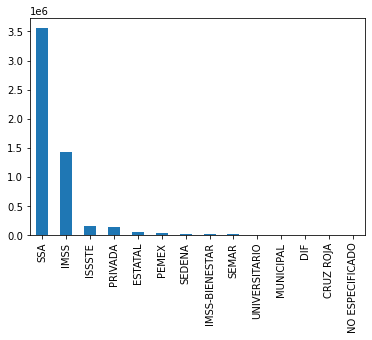

In [21]:
datosCovid['SECTOR'].value_counts().plot.bar()

<AxesSubplot:xlabel='SECTOR,CLASIFICACION_FINAL'>

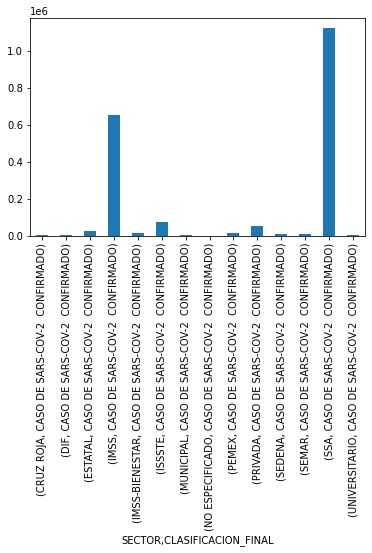

In [34]:
casos=datosCovid.loc[:,['SECTOR','CLASIFICACION_FINAL']]
casos=casos[casos['CLASIFICACION_FINAL']=='CASO DE SARS-COV-2  CONFIRMADO']
casos.groupby('SECTOR')['CLASIFICACION_FINAL'].value_counts().plot.bar()

<AxesSubplot:ylabel='SEXO'>

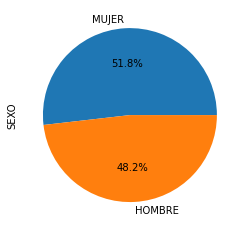

In [23]:
datosCovid['SEXO'].value_counts().plot.pie(autopct='%1.1f%%')

<AxesSubplot:>

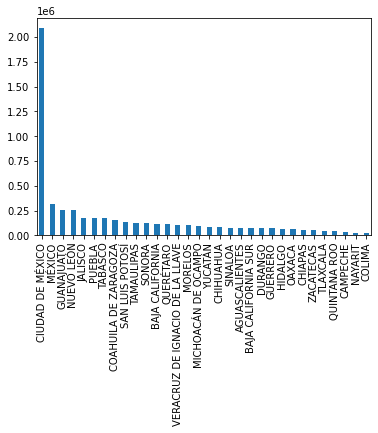

In [24]:
datosCovid['ENTIDAD_UM'].value_counts().plot.bar()

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(-50.0, 0, '(2021-01-09 00:00:00, CASO DE SARS-COV-2  CONFIRMADO)'),
  Text(0.0, 0, '(2020-01-27 00:00:00, CASO DE SARS-COV-2  CONFIRMADO)'),
  Text(50.0, 0, '(2020-04-10 00:00:00, CASO DE SARS-COV-2  CONFIRMADO)'),
  Text(100.0, 0, '(2020-05-30 00:00:00, CASO DE SARS-COV-2  CONFIRMADO)'),
  Text(150.0, 0, '(2020-07-19 00:00:00, CASO DE SARS-COV-2  CONFIRMADO)'),
  Text(200.0, 0, '(2020-09-07 00:00:00, CASO DE SARS-COV-2  CONFIRMADO)'),
  Text(250.0, 0, '(2020-10-27 00:00:00, CASO DE SARS-COV-2  CONFIRMADO)'),
  Text(300.0, 0, '(2020-12-16 00:00:00, CASO DE SARS-COV-2  CONFIRMADO)'),
  Text(350.0, 0, '(2021-02-04 00:00:00, CASO DE SARS-COV-2  CONFIRMADO)'),
  Text(400.0, 0, '')])

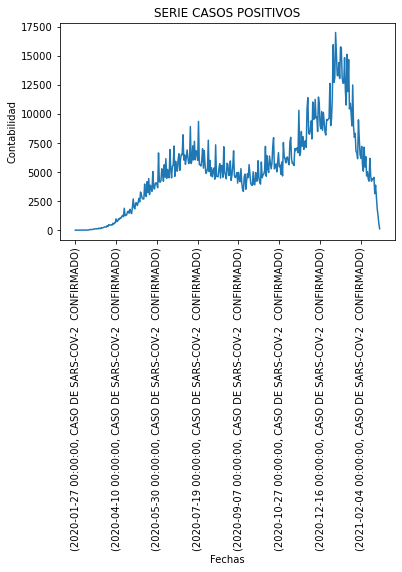

In [35]:
casosPositivos=datosCovid.loc[:,['FECHA_SINTOMAS','CLASIFICACION_FINAL']]
casosPositivos=casosPositivos[casosPositivos['CLASIFICACION_FINAL']=='CASO DE SARS-COV-2  CONFIRMADO']
casosPositivos.groupby('FECHA_SINTOMAS')['CLASIFICACION_FINAL'].value_counts().plot.line(title='SERIE CASOS POSITIVOS',ylabel='Contabilidad',xlabel='Fechas')
plt.xticks(rotation =90)

### Trabajo a futuro
Ya que hemos conseguido un dataset mas concreto y descriptivo, podemos sacar varios análisis exploratorio y hacer modelos para predecir resultados, que resulta lo mas interesante de obtener frente a la pandemia actual.
Con el trabajo anterior, podriamos hacer los siguientes analisis:
+ Con base a las cormorbolidades, ¿Cuáles son las mas significativas respecto al indice de fallecimiento de infectados?
+ Usando un modelo de regresión lineal, ¿ Cuáles son los infectados que se podrían predecir para la siguiente semana?
+ De acuerdo al indice de fallecimiento, ¿Qué sector u hospitales son los que han tenido mas número de fallecimiento? (De ahí, sacar conclusiones del servicio que se ofrecen en ellos)
+ Crear mapa de infectados de acuerdo a su significancia
+ Usar un modelo de regresión logistica para predecir, de acuerdo a las cormorbolidades del paciente, su indice de probabilidad de fallecimiento
  
Entre otras posibilidades con la base bonita que logramos